In [1]:
#!pip install pyldavis

In [2]:

import nltk
nltk.download("words")
nltk.download("stopwords")
nltk.download("wordnet")
#nltk.download('omw-1.4')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MICHEAL\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MICHEAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MICHEAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Uncomment this cell if using google colab

## Connect Google drive
"""
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount = True)

path = "/content/gdrive/MyDrive/Fifth Semester/consumer_complaints.csv"
   """

'\nfrom google.colab import drive\nimport os\ndrive.mount(\'/content/gdrive\', force_remount = True)\n\npath = "/content/gdrive/MyDrive/Fifth Semester/consumer_complaints.csv"\n   '

In [4]:
#Uncomment this cell when using local machine
path = "consumer_complaints.csv"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

#stop = stopwords.words('english')


# This is used for fast string concatination
from io import StringIO
import re

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label

# Use nltk for valid words
import nltk
# Need to make hash 'dictionaries' from nltk for fast processing
import collections as co

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.manifold import TSNE
#from cuml.manifold import TSNE


from nltk.stem import SnowballStemmer,WordNetLemmatizer,PorterStemmer,LancasterStemmer

from collections import Counter
import ast

#import pyLDAvis
#import pyLDAvis.gensim

from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from wordcloud import WordCloud

words = co.Counter(nltk.corpus.words.words())
stopWords = co.Counter( nltk.corpus.stopwords.words() )

C:\Users\MICHEAL\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
# Read the input
df = pd.read_csv(path) 
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [7]:
#view customer complaint narrative because it will be the basis of sentiment analysis
df[~df["consumer_complaint_narrative"].isna()]

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
190207,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
190208,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553084,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,"XXXX XXXX is reporting incorrectly, payments h...",Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1782682
553085,02/10/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,Reflecting incorrect payment status. Have been...,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",WA,980XX,NaN,Consent provided,Web,02/10/2016,Closed with explanation,Yes,No,1781861
553086,02/11/2016,Payday loan,Payday loan,Charged fees or interest I didn't expect,Charged fees or interest I didn't expect,I have been paying {$180.00} a month through d...,NaN,Zarvad III S.A.,NV,891XX,Servicemember,Consent provided,Web,02/11/2016,Closed with explanation,Yes,No,1782804
553090,03/30/2016,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,I recently became aware that Amerisave Mortgag...,Company believes it acted appropriately as aut...,Amerisave,AZ,853XX,NaN,Consent provided,Web,03/30/2016,Closed with explanation,Yes,Yes,1855199


In [8]:
#make dataframe only one column with the complaint column
df = df[["consumer_complaint_narrative"]].copy()
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consumer_complaint_narrative
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
555952,NaN
555953,NaN
555954,NaN
555955,NaN


## Select rows without null values in customer complaints narrative column as new dataframe
### Observations
- Records reduced from over 550k to ~66k

In [9]:
# Only interested in data with consumer complaints removing null values
df = df[~df["consumer_complaint_narrative"].isna()]
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consumer_complaint_narrative
190126,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Due to inconsistencies in the amount owed that...
190155,In XX/XX/XXXX my wages that I earned at my job...
190207,I have an open and current mortgage with Chase...
190208,XXXX was submitted XX/XX/XXXX. At the time I s...
...,...
553084,"XXXX XXXX is reporting incorrectly, payments h..."
553085,Reflecting incorrect payment status. Have been...
553086,I have been paying {$180.00} a month through d...
553090,I recently became aware that Amerisave Mortgag...


In [10]:
#make all strings in every row lowercase
df["consumer_complaint_narrative"] = df["consumer_complaint_narrative"].apply(lambda x: x.lower())
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consumer_complaint_narrative
190126,xxxx has claimed i owe them {$27.00} for xxxx ...
190135,due to inconsistencies in the amount owed that...
190155,in xx/xx/xxxx my wages that i earned at my job...
190207,i have an open and current mortgage with chase...
190208,xxxx was submitted xx/xx/xxxx. at the time i s...
...,...
553084,"xxxx xxxx is reporting incorrectly, payments h..."
553085,reflecting incorrect payment status. have been...
553086,i have been paying {$180.00} a month through d...
553090,i recently became aware that amerisave mortgag...


In [11]:
#count words in each row
df['word_count'] = df['consumer_complaint_narrative'].apply(lambda x: len(str(x).split(" ")))
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,consumer_complaint_narrative,word_count
190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
190135,due to inconsistencies in the amount owed that...,249
190155,in xx/xx/xxxx my wages that i earned at my job...,667
190207,i have an open and current mortgage with chase...,76
190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...
553084,"xxxx xxxx is reporting incorrectly, payments h...",21
553085,reflecting incorrect payment status. have been...,9
553086,i have been paying {$180.00} a month through d...,130
553090,i recently became aware that amerisave mortgag...,238


In [12]:
def _removeNonAscii(s): 
    """
    Function to remove non ascii values in rows of text in dataframe"""
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    """
    Function to clean text in each row of text in dataframe"""
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#Reset dataframe index for indexing while iterating
df = df.reset_index()
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx/xx/xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...,...
66801,553084,"xxxx xxxx is reporting incorrectly, payments h...",21
66802,553085,reflecting incorrect payment status. have been...,9
66803,553086,i have been paying {$180.00} a month through d...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [14]:
#removing non ascii values iteratively by calling predifined function on each row
for i in range(len(df)):
    
    
    df['consumer_complaint_narrative'][i] = _removeNonAscii(df['consumer_complaint_narrative'][i])
    
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them {$27.00} for xxxx ...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx/xx/xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx/xx/xxxx. at the time i s...,260
...,...,...,...
66801,553084,"xxxx xxxx is reporting incorrectly, payments h...",21
66802,553085,reflecting incorrect payment status. have been...,9
66803,553086,i have been paying {$180.00} a month through d...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [15]:
#cleaning text by removing punctuations iteratively
for i in range(len(df)):
    
    
    df['consumer_complaint_narrative'][i] = clean_text(df['consumer_complaint_narrative'][i])
    
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,consumer_complaint_narrative,word_count
0,190126,xxxx has claimed i owe them for xxxx years d...,56
1,190135,due to inconsistencies in the amount owed that...,249
2,190155,in xx xx xxxx my wages that i earned at my job...,667
3,190207,i have an open and current mortgage with chase...,76
4,190208,xxxx was submitted xx xx xxxx at the time i su...,260
...,...,...,...
66801,553084,xxxx xxxx is reporting incorrectly payments ha...,21
66802,553085,reflecting incorrect payment status have been ...,9
66803,553086,i have been paying a month through direct de...,130
66804,553090,i recently became aware that amerisave mortgag...,238


In [16]:
#checking words for stopwords and removing stopwords
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: " ".join(x for x in x.split() if x in words and x not in stopWords))
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,consumer_complaint_narrative,word_count
0,190126,owe despite proof payment check invoice contin...,56
1,190135,due amount told bank amount credit advised wri...,249
2,190155,wages job half knew trouble home loan home loa...,667
3,190207,open current mortgage chase bank chase loan in...,76
4,190208,time complaint dealt mortgage directly stop co...,260
...,...,...,...
66801,553084,incorrectly time vehicle turned time dealership,21
66802,553085,reflecting incorrect payment status time,9
66803,553086,paying month direct debit withdrawal account l...,130
66804,553090,recently aware mortgage corporation illegal ha...,238


## Prepare whole column as a string for plotting word cloud 

In [17]:
s = StringIO()

#write all rows of customer complaints column into a single string
df['consumer_complaint_narrative'].apply(lambda x: s.write(x))

sent = s.getvalue()  #save  string into a new variable
s.close()
#sent = sent.lower()  #make all to lowercase
#print(k)
sent = sent.split()  #split sentence into list

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
len(sent)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3311848

In [19]:
#valid_words = [i for i in sent if i in words and i not in stopWords]  #clean text by removing stopwords
strings = " ".join(sent)  #string of entire comment
coll = co.Counter(sent)    #collection of words

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# visualize 14 most common words
coll.most_common(14)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('credit', 82579),
 ('account', 71178),
 ('loan', 45361),
 ('payment', 43433),
 ('bank', 40696),
 ('told', 36468),
 ('debt', 33066),
 ('report', 31252),
 ('information', 30204),
 ('mortgage', 29145),
 ('time', 29014),
 ('received', 28906),
 ('card', 28843),
 ('company', 26724)]

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


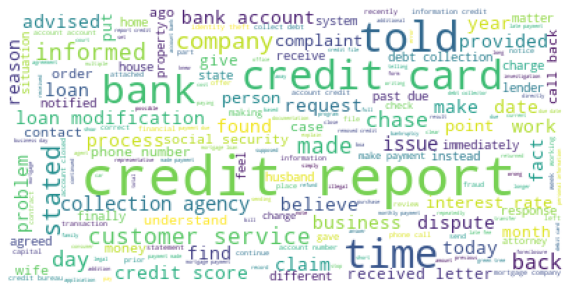

In [21]:
# Read the whole text.
text = strings

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(df),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Normalization

In [22]:
wl = WordNetLemmatizer()
#apply lemmatization
df['consumer_complaint_narrative'] = df['consumer_complaint_narrative'].apply(lambda x: " ".join(wl.lemmatize(x,'v') for x in x.split()))
df

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,index,consumer_complaint_narrative,word_count
0,190126,owe despite proof payment check invoice contin...,56
1,190135,due amount tell bank amount credit advise writ...,249
2,190155,wag job half know trouble home loan home loan ...,667
3,190207,open current mortgage chase bank chase loan in...,76
4,190208,time complaint deal mortgage directly stop con...,260
...,...,...,...
66801,553084,incorrectly time vehicle turn time dealership,21
66802,553085,reflect incorrect payment status time,9
66803,553086,pay month direct debit withdrawal account loan...,130
66804,553090,recently aware mortgage corporation illegal ha...,238


# Topic Modelling 
### Unigram (1), Bi-gram (2) and Tri-gram (3) are used to identify which two or three words show together

In [23]:
#vect = TfidfVectorizer(min_df = 20, max_df = 0.8, sublinear_tf = True ,ngram_range = {2,3})
#transform the vectorized complaints
#matrix_vect= vect.fit_transform(df['consumer_complaint_narrative'])
#matrix_vect

#specify method
method = "tfidf" #choose tfidf
#method = "bow"   #choose bag of words

if method == "tfidf":
    vect = TfidfVectorizer(min_df = 20, max_df = 0.8, sublinear_tf = True ,ngram_range = {1,3})
    matrix_vect= vect.fit_transform(df['consumer_complaint_narrative'])
    #matrix_vect = tfidf(df['consumer_complaint_narrative'], vect)
    
elif method == "bow":
    vect = CountVectorizer(stop_words='english', ngram_range = {1,3})
    matrix_vect= vect.fit_transform(df['consumer_complaint_narrative'])
    #matrix_vect = bow(df['consumer_complaint_narrative'], vect)

else:
    print("Method is tfidf or bow")
    
matrix_vect

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<66806x30002 sparse matrix of type '<class 'numpy.float64'>'
	with 3904472 stored elements in Compressed Sparse Row format>

In [24]:
print(vect)


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfVectorizer(max_df=0.8, min_df=20, ngram_range={1, 3}, sublinear_tf=True)


In [25]:
print(matrix_vect.shape)

(66806, 30002)


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#Analysing for first 10 topics
n_topics = 10

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Definition of helper functions which are: - 
- get_keys: for returning of transformed model either lsa or lda as a list
- key_to_counts: for identifying categories and counts of lsa keys as a tuple
- get_top_n_words: for returning list of n topic strings where n contains most common words

In [27]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Latent  Semantic Analysis

In [30]:
svd = TruncatedSVD(n_components=n_topics, n_iter = 10, random_state = 42)
X = svd.fit_transform(matrix_vect)       

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#np.shape(matrix_vect)
vect

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfVectorizer(max_df=0.8, min_df=20, ngram_range={1, 3}, sublinear_tf=True)

- pyLDAvis was used to visualize the topic results from LSA but did not work

In [32]:
#pyLDAvis.sklearn.prepare(svd, matrix_vect, vect)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def get_topics(components, feature_names, n=15):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx))
        print([(feature_names[i], topic[i])
        for i in topic.argsort()[:-n - 1:-1]])

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
#can be used to visualize all strings and their percentage 
get_topics(svd.components_,vect.get_feature_names())

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
[('credit', 0.2292422686866088), ('account', 0.2025421688814706), ('report', 0.1497800603330323), ('time', 0.14342362542564255), ('loan', 0.1430047061009288), ('payment', 0.14078239341853171), ('bank', 0.1396307267550703), ('debt', 0.13930596539072945), ('receive', 0.1374181292128321), ('tell', 0.1350276207488686), ('make', 0.13351300100600394), ('pay', 0.1265287944766556), ('call', 0.12598277132917063), ('company', 0.12220077662473017), ('information', 0.12217809736630916)]
Topic 1:
[('report', 0.3870604693941398), ('credit', 0.36449637443187133), ('credit report', 0.33871537199347296), ('remove', 0.1806905981935511), ('debt', 0.16715229687331254), ('collection', 0.1291850636643593), ('remove credit', 0.09616853376614279), ('information', 0.09469915440579295), ('agency', 0.08050389579180008), ('dispute', 0.0750301180323587), ('remove credit report', 0.07133611609837406), ('account', 0.06356366475135429), ('identity', 0.06096778831088331), ('collection agency', 0.0577389389935

## Topics using BOW
Topic 0:
[('credit', 0.40593500028073765), ('account', 0.3952188970734264), ('payment', 0.23384944839470534), ('bank', 0.22667920652095755), ('loan', 0.20612249743416405), ('make', 0.19412736450204024), ('tell', 0.185678431243838), ('time', 0.1804923421374289), ('receive', 0.1772463146016646), ('pay', 0.147071827736843), ('card', 0.1440091084910229), ('information', 0.1366796269884684), ('mortgage', 0.1355142600758595), ('report', 0.13454819418972766), ('debt', 0.12284285440024828)]

Topic 1:
[('credit', 0.5935522894303882), ('report', 0.23151631970300515), ('credit report', 0.15955529916607705), ('card', 0.1494673239498715), ('account', 0.11419641114218057), ('debt', 0.10303897924332955), ('credit card', 0.09094697773541276), ('information', 0.07348527398125533), ('remove', 0.06716636899005088), ('collection', 0.058038100127374606), ('dispute', 0.04204211745627537), ('score', 0.0385357019304694), ('agency', 0.032735517255644817), ('inquiry', 0.02687460103168957), ('consumer', 0.025756860185185818)]

Topic 2:
[('account', 0.6494949365086219), ('bank', 0.3340467985270947), ('check', 0.10173299080523028), ('money', 0.08621412646828928), ('card', 0.07924643379100052), ('close', 0.06604559698881028), ('fund', 0.06329215592822603), ('bank account', 0.047743936708021815), ('fee', 0.04447110670494998), ('deposit', 0.043263926593783454), ('branch', 0.04004320704245171), ('overdraft', 0.03981847216189105), ('customer', 0.03846756707796152), ('account account', 0.03669195154198313), ('balance', 0.03652301677305398)]

Topic 3:
[('payment', 0.522221078489312), ('card', 0.29694710789969503), ('credit', 0.22031723485897653), ('make', 0.1933242081885064), ('late', 0.15093825001087968), ('credit card', 0.1416569164766655), ('pay', 0.09236594950245405), ('month', 0.08442267041389402), ('make payment', 0.07607995341555192), ('fee', 0.06426301433209895), ('balance', 0.06126418574319061), ('apply', 0.04242883941749504), ('charge', 0.04034030561350662), ('late fee', 0.03691984402352428), ('monthly', 0.03653037446482626)]

Topic 4:
[('bank', 0.5519003213954718), ('loan', 0.312234227926754), ('credit', 0.20657444994093713), ('card', 0.16969186788079463), ('home', 0.09174264964058218), ('credit card', 0.07751666228277077), ('mortgage', 0.07225032689878783), ('modification', 0.06543354216390017), ('chase', 0.06159392909138616), ('loan modification', 0.04393033952041547), ('property', 0.03545226712567885), ('fraud', 0.03517361049908714), ('application', 0.034195653404965436), ('close', 0.03173624040920094), ('house', 0.03128201325171785)]
Topic 5:
[('account', 0.4955517477283149), ('loan', 0.350495017805592), ('report', 0.14404023250282913), ('mortgage', 0.13699199661906694), ('payment', 0.11573330963301945), ('credit report', 0.09872680592677543), ('credit', 0.09733373713925074), ('modification', 0.05610285145905641), ('remove', 0.04668415095063021), ('escrow', 0.040827390257144845), ('loan modification', 0.039449629670757574), ('account account', 0.03822775269010735), ('close', 0.033830543906463444), ('late', 0.030857675376140065), ('date', 0.02649399198463642)]

Topic 6:
[('card', 0.46183096035220556), ('tell', 0.24290039451867193), ('loan', 0.24177673791164656), ('account', 0.1822313880239993), ('credit card', 0.14934355504339478), ('time', 0.08682271293789053), ('number', 0.08515585996766377), ('phone', 0.07232932748658395), ('receive', 0.06985830218435785), ('close', 0.06236361554373774), ('speak', 0.06017162347761121), ('pay', 0.05854962196113892), ('company', 0.04627336371933212), ('service', 0.04565691734573781), ('balance', 0.04041025553852012)]

Topic 7:
[('loan', 0.4573754922437538), ('debt', 0.4325847579924371), ('bank', 0.153062785389998), ('card', 0.15112044217515108), ('payment', 0.13706828631695972), ('pay', 0.12542886730396244), ('collection', 0.099065882947271), ('credit card', 0.07836439523452768), ('balance', 0.07367004323319572), ('make', 0.05592354061004356), ('student', 0.04505523037028223), ('collect', 0.041334604552186745), ('debt collection', 0.0411363935113848), ('collector', 0.036525789130470006), ('debt collector', 0.03278348939898753)]

Topic 8:
[('mortgage', 0.5710226827468606), ('card', 0.34402166515673027), ('debt', 0.3067011146562158), ('credit card', 0.15487767187045923), ('home', 0.13807958557388342), ('account', 0.09473628171486649), ('property', 0.08416742435363861), ('company', 0.07605517940486732), ('chase', 0.07042661953516097), ('escrow', 0.06824257607155088), ('foreclosure', 0.05940777637786676), ('insurance', 0.059158118208795275), ('mortgage company', 0.051463714216904495), ('balance', 0.046350815523016245), ('collection', 0.04225732220283759)]

Topic 9:
[('pay', 0.40474580154253165), ('tell', 0.28143356161677074), ('money', 0.20837037811873302), ('time', 0.18180945724166706), ('mortgage', 0.13993420551165983), ('company', 0.1333913372947412), ('credit', 0.108375554663278), ('home', 0.10044058655311842), ('work', 0.09616080247451192), ('debt', 0.08839272926075373), ('month', 0.07236668873667487), ('check', 0.06793269071454137), ('insurance', 0.06613814299152262), ('house', 0.06434506945454505), ('car', 0.055798554450916464)]
1



## Topics using TFIDF

Topic 0:
[('credit', 0.22924226868660827), ('account', 0.20254216888147034), ('report', 0.14978006033303196), ('time', 0.14342362542564224), ('loan', 0.14300470610092847), ('payment', 0.14078239341853155), ('bank', 0.13963072675507016), ('debt', 0.1393059653907292), ('receive', 0.13741812921283184), ('tell', 0.13502762074886837), ('make', 0.13351300100600372), ('pay', 0.12652879447665535), ('call', 0.12598277132917046), ('company', 0.12220077662472996), ('information', 0.12217809736630894)]
Topic 1:
[('report', 0.38706046939414046), ('credit', 0.36449637443187183), ('credit report', 0.3387153719934736), ('remove', 0.1806905981935513), ('debt', 0.16715229687331276), ('collection', 0.1291850636643594), ('remove credit', 0.0961685337661429), ('information', 0.09469915440579327), ('agency', 0.08050389579180015), ('dispute', 0.07503011803235883), ('remove credit report', 0.07133611609837419), ('account', 0.06356366475135414), ('identity', 0.06096778831088344), ('collection agency', 0.057738938993522594), ('account credit', 0.05542709317421403)]
Topic 2:
[('debt', 0.4121250401992873), ('call', 0.2373889842112461), ('collection', 0.19584210358754062), ('phone', 0.15034431491983344), ('number', 0.1332483464134868), ('collect', 0.11937334025167684), ('company', 0.11902816593270682), ('agency', 0.11421390680069567), ('collection agency', 0.1067205843963044), ('owe', 0.09870058969499465), ('debt collection', 0.09499856888116223), ('collector', 0.09007138860498294), ('collect debt', 0.08889992093255802), ('debt collector', 0.07618253199930487), ('stop', 0.0743820734591603)]
Topic 3:
[('loan', 0.31675044977483213), ('mortgage', 0.2727202171186212), ('report', 0.19676901209231323), ('modification', 0.1809596400551306), ('credit report', 0.18060490337618032), ('home', 0.15483968845705606), ('foreclosure', 0.10890204144287384), ('loan modification', 0.1069569014629682), ('property', 0.0987232458328874), ('house', 0.08544208762947926), ('remove', 0.08133515270179474), ('credit', 0.08085253182004681), ('bankruptcy', 0.07263794122799332), ('rate', 0.07010787714056589), ('sell', 0.06998334315644548)]
Topic 4:
[('debt', 0.3119131058102771), ('collection', 0.24445100151863164), ('payment', 0.1900861497125352), ('collection agency', 0.14312683248761032), ('balance', 0.1427259695801821), ('agency', 0.14212481740555205), ('account', 0.13952523605301054), ('amount', 0.13315549269700733), ('bill', 0.13192873181355863), ('pay', 0.1262287481761691), ('interest', 0.10931149583159383), ('owe', 0.0997947735668475), ('late', 0.09900157492051614), ('collect', 0.08923165979817103), ('month', 0.08151054804741943)]
Topic 5:
[('card', 0.2395720436132655), ('credit', 0.23695959909542622), ('call', 0.2130575234571603), ('credit card', 0.20421799748345715), ('pay', 0.1334248407257998), ('payment', 0.1284114854868357), ('phone', 0.11604202186617742), ('credit report', 0.11434793909241765), ('late', 0.11207693173908749), ('interest', 0.10146612616701822), ('score', 0.0982418691385946), ('month', 0.08751043782286803), ('bill', 0.07765255748512873), ('report', 0.07691362914828885), ('credit score', 0.07646531690168425)]
Topic 6:
[('card', 0.4183297496627966), ('credit card', 0.3192339915765699), ('debt', 0.1725605726414272), ('credit', 0.10856936669055081), ('provide', 0.08513745354476371), ('modification', 0.08003211907814818), ('letter', 0.07292107345006762), ('chase', 0.06910820894578848), ('interest', 0.06698455812954893), ('application', 0.06412475724250466), ('home', 0.06248372324938261), ('rate', 0.059258657023804694), ('foreclosure', 0.05638611706480873), ('identity', 0.05586211485807063), ('fraud', 0.05434072574378379)]
Topic 7:
[('payment', 0.2084611958566386), ('inquiry', 0.1600694210024729), ('late', 0.13702472534129487), ('make', 0.12373028487630956), ('view credit', 0.11761393252631394), ('view', 0.10739613278902896), ('bill', 0.10082217579144133), ('fraudulent', 0.10051015131056289), ('unauthorized', 0.09909832850746811), ('provide', 0.09820898372000511), ('unauthorized fraudulent', 0.09668971879081849), ('view credit report', 0.09458633475210583), ('authorize', 0.08641144387869959), ('days', 0.0836206363667002), ('mail', 0.0818477615883428)]
Topic 8:
[('bank', 0.22849592342063066), ('debt', 0.20693710661159917), ('money', 0.19611085072283618), ('inquiry', 0.14698191546916584), ('loan', 0.13475882579050152), ('credit report', 0.10081832880987462), ('view credit', 0.09950368462919983), ('pay', 0.09195587543124961), ('hard', 0.09175457380454975), ('view', 0.08691411807158975), ('authorize', 0.08598834770938799), ('check', 0.08466797723792968), ('owe', 0.08433245414476293), ('unauthorized', 0.08270085292655956), ('unauthorized fraudulent', 0.0814675884768566)]
Topic 9:
[('identity', 0.3844248354214627), ('theft', 0.3599388183624803), ('identity theft', 0.3317284635203122), ('victim', 0.21317110076941598), ('victim identity', 0.199061165868302), ('victim identity theft', 0.19722821246800845), ('loan', 0.15640854239843688), ('police', 0.1409209574322502), ('interest', 0.13289276898074867), ('pay', 0.11570227631434479), ('police report', 0.11452967914760007), ('payment', 0.10161107100209404), ('fraudulent', 0.10049818763955007), ('steal', 0.09834995411507164), ('social', 0.09138061904582097)]
Topics 

## Comparison of Bag of Words (Count Vectorizer) and Term Frequency - Inverse Document Frequency

- Bag of Words: - does not classify topics as effectively because it loses semantic meaning of words and takes too long processing time when it is being used to extract topics using either of Latent Semantic Analysis or Latent Dirichlet Allocation

- TFIDF: - this method performs quite well in extracting semantic meaning of words and uses less processing time which is why it is chosen for the analsis in this project

## From the list of ten topics below using TFIDF, the following general ideas can be established: - 
- Topic 0: Loan
- Topic 1: Credit removal
- Topic 2: Communication on Fraud activity
- Topic 3: Credit modification
- Topic 4: Collection agency
- Topic 5: Communication
- Topic 6: Credit
- Topic 7: Credit Inquiry
- Topic 8: Credit report
- Topic 9: Inquiry

Note: it was  observed that using 1-gram and bigram and Trigrams, there was slight difference in topics

In [35]:
terms = vect.get_feature_names()
for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=" ")
    print(" ")

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 
credit account report time loan payment bank  
Topic 1: 
report credit credit report remove debt collection remove credit  
Topic 2: 
debt call collection phone number collect company  
Topic 3: 
loan mortgage report modification credit report home foreclosure  
Topic 4: 
debt collection payment collection agency balance agency account  
Topic 5: 
card credit call credit card pay payment phone  
Topic 6: 
card credit card debt credit provide modification letter  
Topic 7: 
payment inquiry late make view credit view bill  
Topic 8: 
bank debt money inquiry loan credit report view credit  
Topic 9: 
identity theft identity theft victim victim identity victim identity theft loan  


In [36]:
#Get keys for lsa model in a list
lsa_keys = get_keys(X)
#print(f"Lsa Keys: {lsa_keys}")


#Get categories and corresponding magnitude
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)
print(lsa_categories)
print(lsa_counts)

[0, 3, 1, 2, 9, 6, 5, 4, 7, 8]
[52737, 1590, 4699, 3883, 1351, 960, 312, 679, 344, 251]


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
print(lsa_keys)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 9, 0, 0, 1, 0, 9, 1, 9, 9, 1, 9, 0, 0, 0, 9, 0, 0, 9, 2, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 9, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 9, 1, 0, 9, 0, 9, 0, 0, 0, 0, 9, 0, 9, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Below bar chart is to plot first n (1 - 5) words for each individual topics 
### It can be observed that topic one has most headlines

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


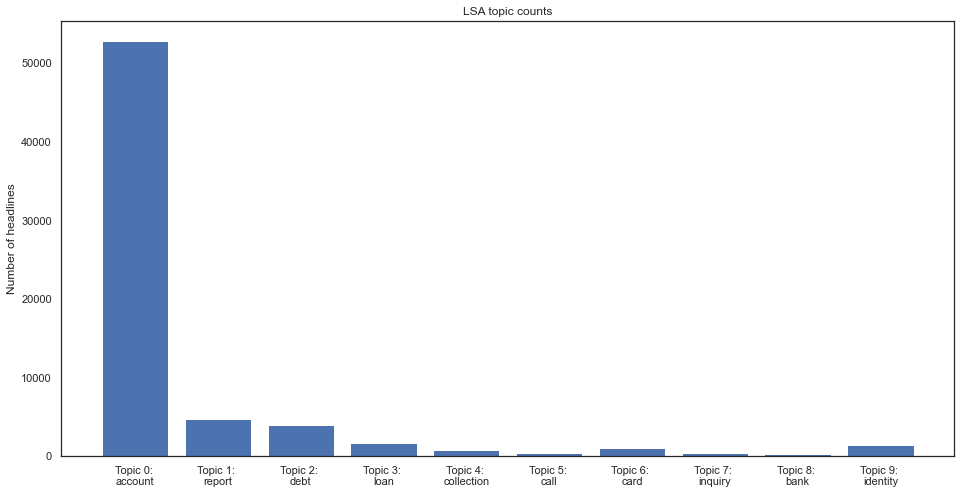

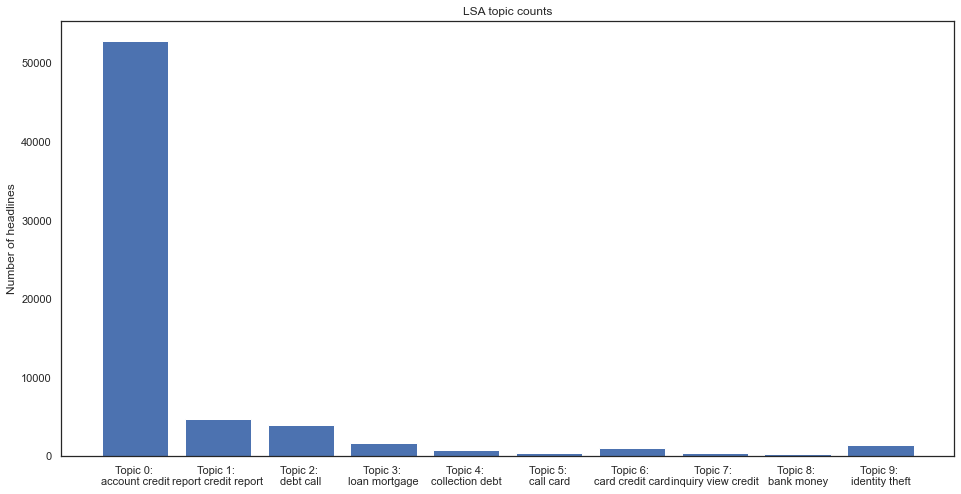

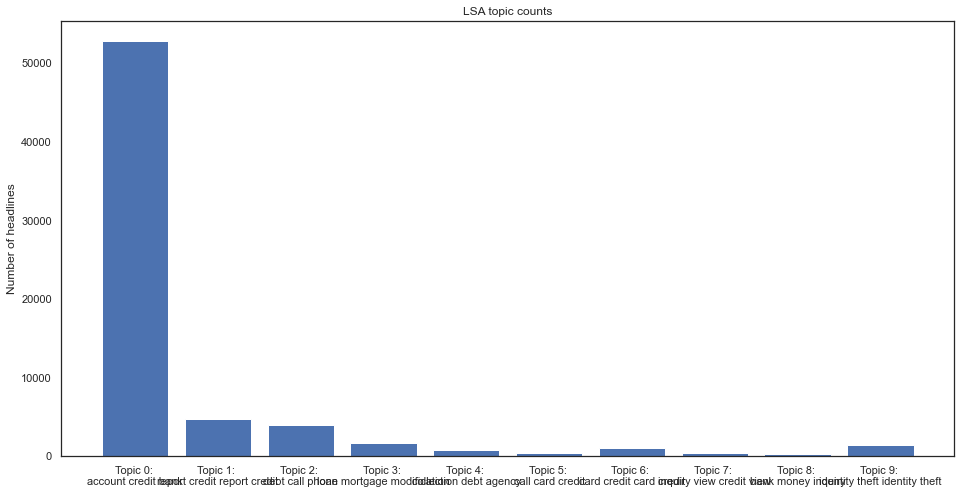

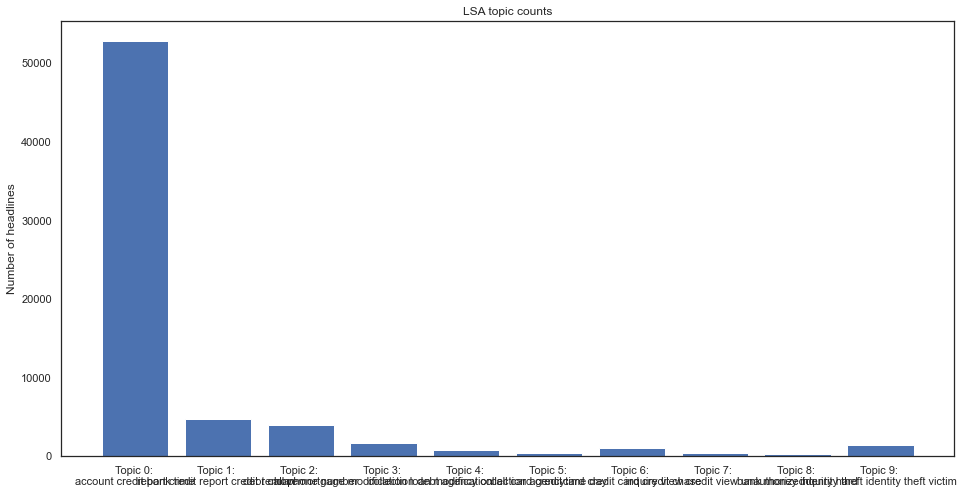

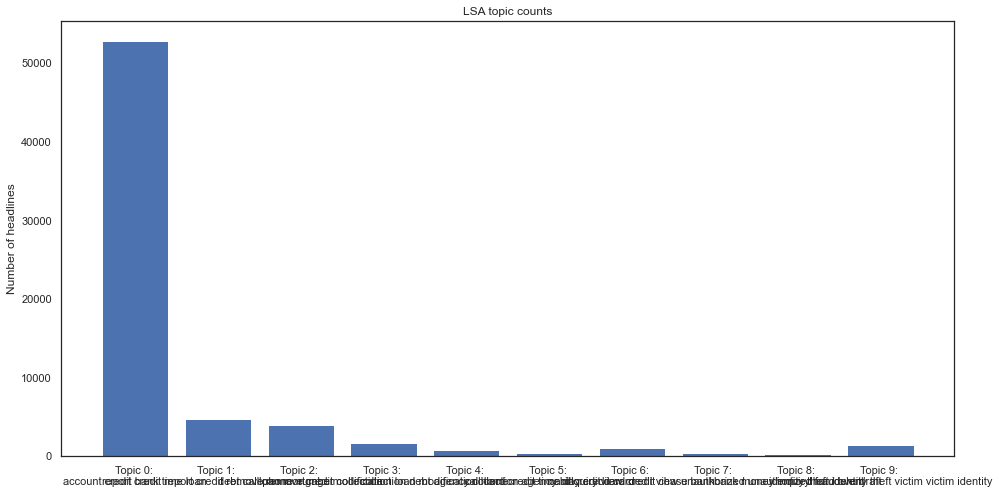

In [38]:
#Plot bar charts for top 5 words individually
n = 5
for i in range(n):

    top_n_words = get_top_n_words(i+1, lsa_keys, matrix_vect, vect)
    labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lsa_categories]

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(lsa_categories, lsa_counts);
    ax.set_xticks(lsa_categories);
    ax.set_xticklabels(labels);
    ax.set_ylabel('Number of headlines');
    ax.set_title('LSA topic counts');
    plt.show()

### In order to properly contrast LSA with LDA we instead use a dimensionality-reduction technique called  t -SNE, which will also serve to better illuminate the success of the clustering process


### NB
- It can be observed that TSNE function takes a lot of time to execute depending on machine specifications
- Scatter plot after TSNE opens in  new tab

In [ ]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(X)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 66806 samples in 0.720s...
[t-SNE] Computed neighbors for 66806 samples in 77.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66806
[t-SNE] Computed conditional probabilities for sample 2000 / 66806
[t-SNE] Computed conditional probabilities for sample 3000 / 66806
[t-SNE] Computed conditional probabilities for sample 4000 / 66806
[t-SNE] Computed conditional probabilities for sample 5000 / 66806
[t-SNE] Computed conditional probabilities for sample 6000 / 66806
[t-SNE] Computed conditional probabilities for sample 7000 / 66806
[t-SNE] Computed conditional probabilities for sample 8000 / 66806
[t-SNE] Computed conditional probabilities for sample 9000 / 66806
[t-SNE] Computed conditional probabilities for sample 10000 / 66806
[t-SNE] Computed conditional probabilities for sample 11000 / 66806
[t-SNE] Computed conditional probabilities for sample 12000 / 66806
[t-SNE] Computed conditional probabilities for s

#### Having reduced n_topics-dimensional vectors to two-dimensional representation, clusters can be plotted using Bokeh for derving centroid location for each topic for better visualization

In [39]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
top_n_words_lsa = get_top_n_words(i, lsa_keys, matrix_vect, vect)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
    text=top_n_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##  LDA

In [41]:
print(matrix_vect.shape)

(66806, 30002)


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', random_state=42,  max_iter=1)
lda_top = lda_model.fit_transform(matrix_vect)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Topic  0 :  8.387120238058516 %
Topic  1 :  1.9329155560561961 %
Topic  2 :  1.931035014388503 %
Topic  3 :  43.91232739504328 %
Topic  4 :  1.9303078949065844 %
Topic  5 :  1.9303076383900843 %
Topic  6 :  1.930307643407263 %
Topic  7 :  1.9332288207541288 %
Topic  8 :  1.9303171589172319 %
Topic  9 :  34.18213264007821 %


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## BOW Results

- Topic  0 :  6.565312784087615 %
- Topic  1 :  0.27030652150558154 %
- Topic  2 :  0.27031928537281374 %
- Topic  3 :  0.27029766243208864 %
- Topic  4 :  0.27041215692840653 %
- Topic  5 :  0.27034885675539744 %
- Topic  6 :  0.2703069863222442 %
- Topic  7 :  0.2703331950421085 %
- Topic  8 :  69.80045656988845 %
- Topic  9 :  21.74190598166531 %

## TFIDF Results
- Topic  0 :  8.387120238058518 %
- Topic  1 :  1.9329155560561955 %
- Topic  2 :  1.931035014388503 %
- Topic  3 :  43.91232739504338 %
- Topic  4 :  1.9303078949065848 %
- Topic  5 :  1.9303076383900848 %
- Topic  6 :  1.9303076434072635 %
- Topic  7 :  1.933228820754128 %
- Topic  8 :  1.9303171589172323 %
- Topic  9 :  34.18213264007811 %

In [44]:
pyLDAvis.sklearn.prepare(lda_model, matrix_vect, vect)

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.172443 -0.066538       1        1  41.770759
2      0.197356 -0.179122       2        1  24.331848
1      0.254883  0.166333       3        1  15.995098
9     -0.063487  0.137671       4        1   3.235417
7     -0.081613 -0.133752       5        1   3.055887
4     -0.086060  0.131976       6        1   3.045141
8     -0.064618  0.163956       7        1   2.914916
5     -0.109425 -0.077026       8        1   1.959997
0     -0.114959 -0.074650       9        1   1.848747
6     -0.104521 -0.068847      10        1   1.842191, topic_info=                         Term         Freq        Total Category  logprob  \
7525                   credit  2024.000000  2024.000000  Default  30.0000   
24029                  report  1415.000000  1415.000000  Default  29.0000   
8042            credit report  1075.000000  1075.000000  Default  28.0000   
23767                  remove   858.000000   858.000000  Default  27.0000   
9124                     debt  1206.000000  1206.000000  Default  26.0000   
...                       ...          ...          ...      ...      ...   
6265      company file verify    21.129113    22.154637  Topic10  -5.9594   
22576                put debt    20.810233    21.835598  Topic10  -5.9746   
24376            report union    20.727388    21.752110  Topic10  -5.9786   
11617  file complaint request    20.731817    21.756789  Topic10  -5.9784   
20060                past day    21.932170    25.343735  Topic10  -5.9221   

       loglift  
7525   30.0000  
24029  29.0000  
8042   28.0000  
23767  27.0000  
9124   26.0000  
...        ...  
6265    3.9468  
22576   3.9461  
24376   3.9460  
11617   3.9460  
20060   3.8496  

[571 rows x 6 columns], token_table=       Topic      Freq                    Term
term                                          
66         1  0.592438              acceptance
66         8  0.390142              acceptance
68         8  0.941493  acceptance corporation
69         1  0.901722                  access
69         2  0.003390                  access
...      ...       ...                     ...
29852     10  0.952525            wrong credit
29878      1  0.418205                    year
29878      2  0.480082                    year
29878      3  0.098150                    year
29903      4  0.969195             year credit

[942 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 10, 8, 5, 9, 6, 1, 7])

## From the list of ten topics below and visualization using pyldavis above which is achieved by adjusting the relevance metric, the following general ideas can be establihed: - 
- Topic 0: Payment
- Topic 1: Loan and Mortgage
- Topic 2: Debt Collection and persoal data
- Topic 3: Inquiry and debt collection agency
- Topic 4: Inquiry through call
- Topic 5: Credit report
- Topic 6: Information about credit information
- Topic 7: Identity Theft
- Topic 8: Annual Data and wage garnishment
- Topic 9: Negative effect of mortgage

Note: it was  observed that using 1-gram and bigram, there was slight difference in topics

In [46]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print(" ")

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 
garnish wag garnish wag garnishment account credit card wage wrong account pinnacle stop credit charge late fee  
Topic 1: 
debt credit report information collection number call company credit report phone  
Topic 2: 
loan mortgage home modification payment pay make work time property  
Topic 3: 
account card bank credit receive tell money payment make balance  
Topic 4: 
report credit report credit score free identity credit score identity theft annual theft  
Topic 5: 
car car loan bankruptcy file loan car credit acceptance dealership car car remove hard global investigate credit  
Topic 6: 
card payment nasty negatively affect chase credit convergent replacement card credit card payment chase credit card promptly delete information section promptly  
Topic 7: 
time day call day call time stop call stop call time day continue call green tree  
Topic 8: 
remove report credit report credit remove credit item belong remove credit report information credit delete  
Topic 9: 
co

In [47]:
lda_keys = get_keys(lda_top)
lda_categories, lda_counts = keys_to_counts(lda_keys)
print(lda_categories)
print(lda_counts)

[3, 2, 4, 7, 1, 6, 8, 9, 5, 0]
[34764, 14873, 729, 435, 14081, 160, 833, 645, 196, 90]


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
print(type(lda_keys))

C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'list'>


C:\Users\MICHEAL\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


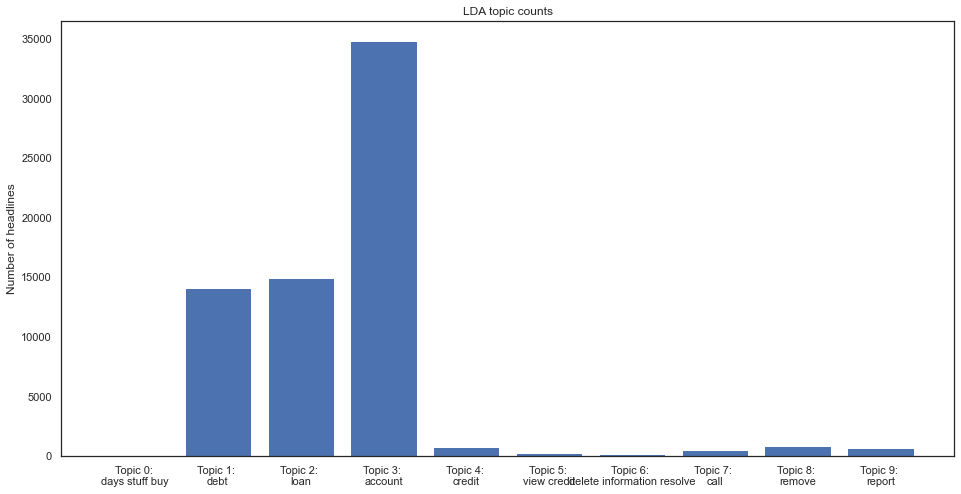

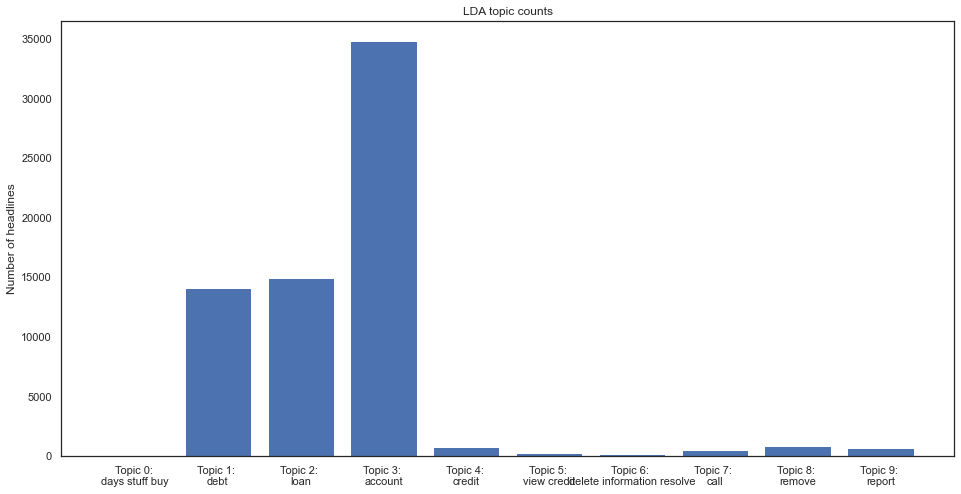

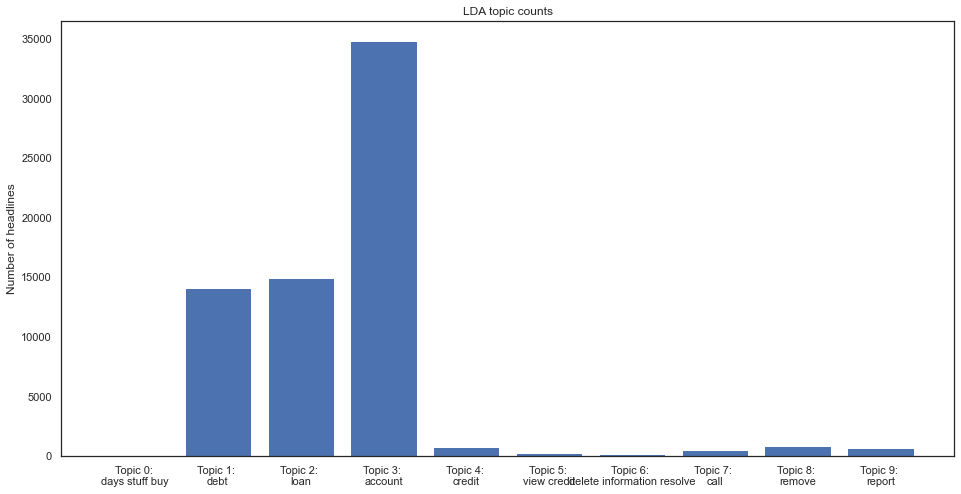

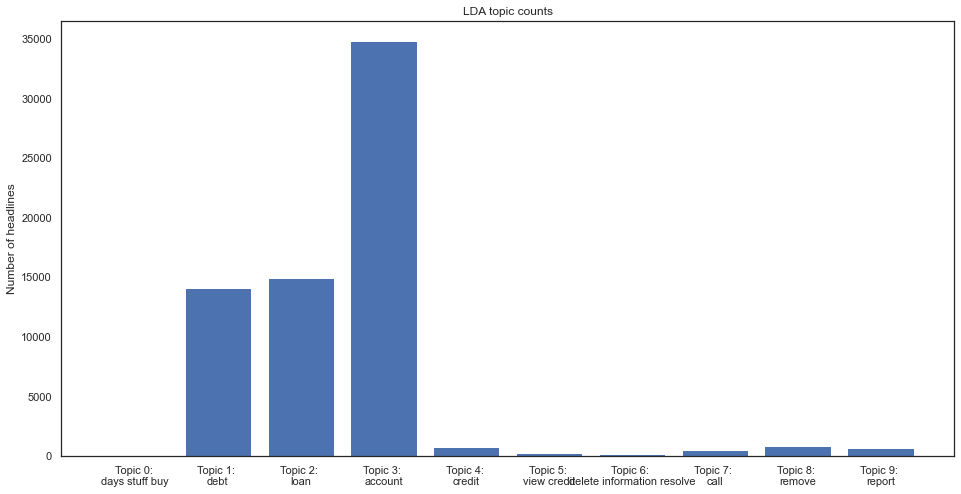

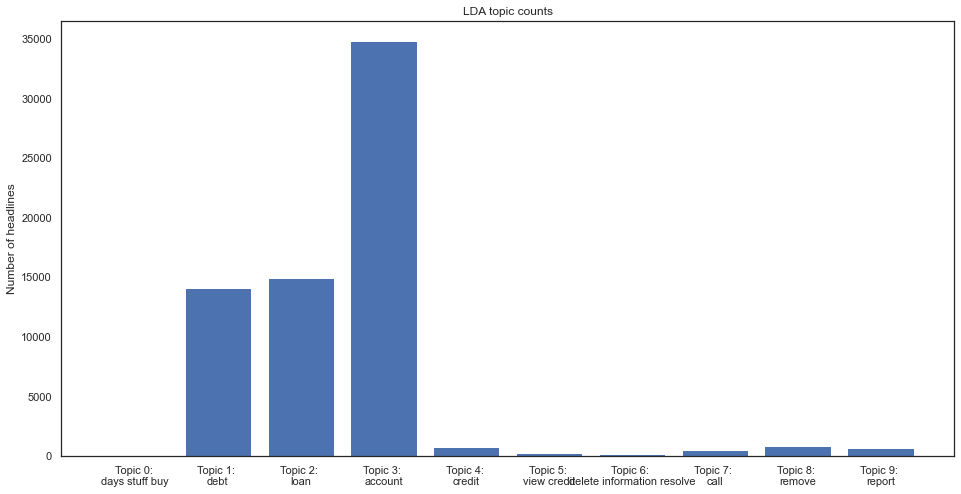

In [49]:

for j in range(5):
    top_n_words = get_top_n_words(1, lda_keys, matrix_vect, vect)
    labels = ['Topic {}: \n'.format(i) + top_n_words[i] for i in lda_categories]

    fig, ax = plt.subplots(figsize=(16,8))
    ax.bar(lda_categories, lda_counts);
    ax.set_xticks(lda_categories);
    ax.set_xticklabels(labels);
    ax.set_title('LDA topic counts');
    ax.set_ylabel('Number of headlines'); 
    plt.show()

In [ ]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_top)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 66806 samples in 0.558s...
[t-SNE] Computed neighbors for 66806 samples in 132.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 66806
[t-SNE] Computed conditional probabilities for sample 2000 / 66806
[t-SNE] Computed conditional probabilities for sample 3000 / 66806
[t-SNE] Computed conditional probabilities for sample 4000 / 66806
[t-SNE] Computed conditional probabilities for sample 5000 / 66806
[t-SNE] Computed conditional probabilities for sample 6000 / 66806
[t-SNE] Computed conditional probabilities for sample 7000 / 66806
[t-SNE] Computed conditional probabilities for sample 8000 / 66806
[t-SNE] Computed conditional probabilities for sample 9000 / 66806
[t-SNE] Computed conditional probabilities for sample 10000 / 66806
[t-SNE] Computed conditional probabilities for sample 11000 / 66806
[t-SNE] Computed conditional probabilities for sample 12000 / 66806
[t-SNE] Computed conditional probabilities for 

In [ ]:
top_n_words_lda = get_top_n_words(i, lda_keys, matrix_vect, vect)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
    text=top_n_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

## It can be observed by the difference in both plots of LDA and LSA that LDA has more success identifying topics than LSA which means that LDA appears to be the optimal algorithm for this semantic analysis on this dataset